<a href="https://colab.research.google.com/github/hatimdeve/python/blob/main/tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pydotplus

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import metrics
from sklearn import tree
from six import StringIO


In [3]:
from google.colab import files 
import io
uploaded=files.upload()


Saving DecisionTree_PastHires.csv to DecisionTree_PastHires.csv


In [4]:
df=pd.read_csv(io.BytesIO(uploaded['DecisionTree_PastHires.csv']))

In [5]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [6]:
df['Level of Education'].value_counts()

BS     7
PhD    4
MS     2
Name: Level of Education, dtype: int64

In [8]:
d1={'Y':1,'N':0}
d2={'BS':1,'MS':2,'PhD':3}
df['Employed?']=df['Employed?'].map(d1)
df['Top-tier school']=df['Top-tier school'].map(d1)
df['Interned']=df['Interned'].map(d1)
df['Hired']=df['Hired'].map(d1)
df['Level of Education']=df['Level of Education'].map(d2)

In [9]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,1,0,0,1
1,0,0,0,1,1,1,1
2,7,0,6,1,0,0,0
3,2,1,1,2,1,0,1
4,20,0,2,3,1,0,0


In [51]:
X=pd.DataFrame(df.iloc[:,:-1].values)
y=df.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
model=DecisionTreeClassifier(criterion="gini")


In [43]:
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

In [44]:
print(accuracy_score(y_test,y_predict))

0.6666666666666666


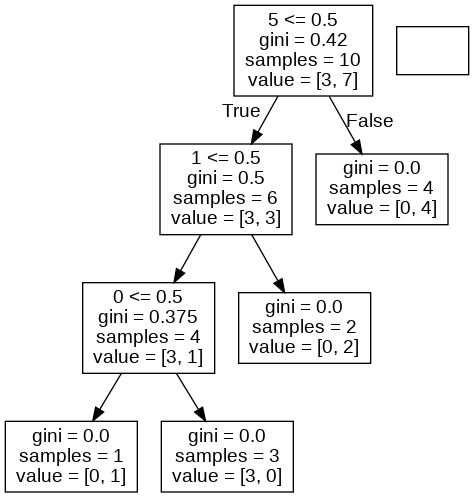

In [46]:
data_node=StringIO()
tree.export_graphviz(model,out_file=data_node,feature_names=X.columns)
graph=pydotplus.graph_from_dot_data(data_node.getvalue())
Image(graph.create_png())